We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.

fitting it to the periodic function plot the fit Data Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25 Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [1]:
%matplotlib inline

Text(0,0.5,'Temperature (°C)')

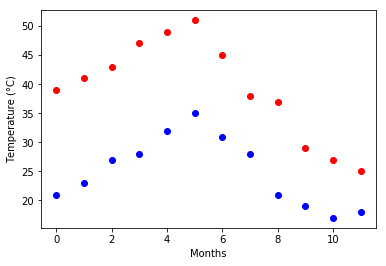

In [4]:
import numpy as np

temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

import matplotlib.pyplot as plt
months=np.arange(12)
plt.plot(months,temp_max,'ro')
plt.plot(months,temp_min,'bo')
plt.xlabel("Months")
plt.ylabel("Temperature (°C)")

Task:
1. fitting it to the periodic function

In [5]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

2. plot the fit

Text(0,0.5,'Temperature ($^\\circ$C)')

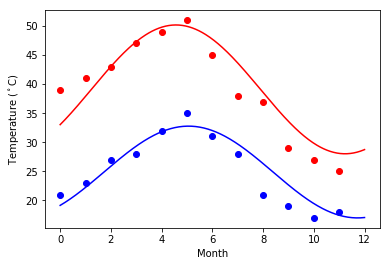

In [6]:
days = np.linspace(0, 12, 365)
plt.figure
plt.plot(months,temp_max,'ro')
plt.plot(months,temp_min,'bo')
plt.plot(days, yearly_temps(days, *res_max),'r-')
plt.plot(days, yearly_temps(days, *res_min),'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

Matplotlib:
This assignment is for visualization using matplotlib:

([<matplotlib.patches.Wedge at 0x9a83702b38>,
 [Text(-0.989341,0.480837,'Female'), Text(0.989341,-0.480837,'Male')],
 [Text(-0.539641,0.262275,'35.6%'), Text(0.539641,-0.262275,'64.4%')])

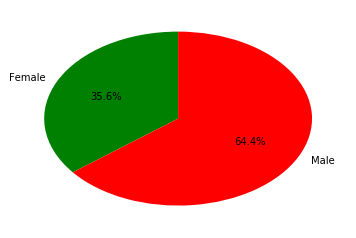

In [7]:
import pandas as pd
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url)
import matplotlib.pyplot as plt
gender=titanic.groupby('sex')
gender_count=list(gender.count()['pclass'])
sex=['Female','Male']
plt.pie(gender_count, labels=sex, colors=['g','r'], startangle=90, autopct='%.1f%%')

2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [9]:
df=titanic.groupby('sex')
print(df)

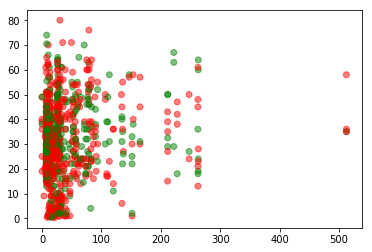

In [11]:
titanic_sex = titanic.dropna(subset=['sex'])

mapping = {'male' : 'red', 'female' : 'green'}
plt.scatter(titanic['fare'], titanic['age'], alpha=0.5 ,c=titanic_sex['sex'].map(mapping))